# TensorFlow and Gradient Boosting Classifier

In [5]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
import warnings
import os
import random
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility

In [6]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
plt.rcParams.update({'font.size': 25})
sns.set_theme(color_codes=True)
warnings.filterwarnings('ignore')

# Load data

In [7]:
train_df = pd.read_csv("C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Train.csv")
test_df = pd.read_csv('C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Test.csv')

# Drop unnecessary columns

In [8]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(train_df.head())
print(test_df.head())
print(f"Training data shape: {train_df.shape}\nTest data shape: {test_df.shape}")

     acc_max   gyro_max  acc_kurtosis  gyro_kurtosis label    lin_max  \
0  26.039919   7.309797     20.378162       2.782476   SDL  11.131080   
1  25.864500   6.511954     14.187190       5.324864   FOL   7.945561   
2  27.524501  12.944099     31.855926      22.891186   FOL  14.454818   
3  30.647705  11.694868     23.608764       9.287735   FOL  15.228303   
4  26.373917  11.168424     14.318453      15.983202   FKL  10.007396   

   acc_skewness  gyro_skewness  post_gyro_max  post_lin_max  fall  
0      3.891361       1.592927       7.086618     10.790400     1  
1      3.022175       2.376939       6.325522      7.719352     1  
2      4.849024       4.283890      12.888111     14.368784     1  
3      3.921537       2.794609      11.549971     14.944151     1  
4      3.087975       3.363557      11.057636      9.753058     1  
     acc_max   gyro_max  acc_kurtosis  gyro_kurtosis label    lin_max  \
0  28.055199  10.794617     21.334536      34.163811   FOL  13.880578   
1  26.6

# Split data into features and target

In [9]:
X_train = train_df.drop(['fall', 'label'], axis=1)
y_train = train_df['fall']
X_test = test_df.drop(['fall', 'label'], axis=1)
y_test = test_df['fall']

# Calculate mutual information scores

In [10]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train, y_train)

# Plot mutual information scores

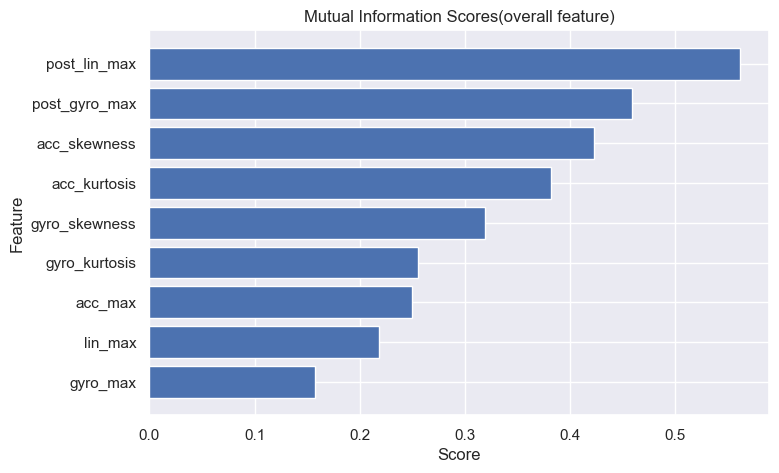

In [11]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores(overall feature)")

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

# Normalize the data

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid

In [13]:
n_estimators = [200, 400, 600, 800, 1000]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
max_depth = [3, 5, 7, 9]
min_samples_split = [2, 5, 9, 12]
min_samples_leaf = [1, 3, 5, 7]
max_features = ['auto', 'sqrt']

random_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

# Hyperparameter search

In [14]:
gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator=gb,
                               param_distributions=random_grid,
                               n_iter=100, cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)
gb_random.fit(X_train, y_train)
best_params = gb_random.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


# Train the best model

In [15]:
gb_best = GradientBoostingClassifier(**best_params)
gb_best.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=9, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=12,
                           n_estimators=800)

# Model evaluation

In [16]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions) * 100
    print('Model Performance')
    print(f'Accuracy = {accuracy:.2f}%.')
    return accuracy

# Evaluate the Gradient Boosting model

In [17]:
accuracy = evaluate(gb_best, X_test, y_test)
print(f"The best accuracy obtained is: {accuracy}%.")

Model Performance
Accuracy = 97.19%.
The best accuracy obtained is: 97.19101123595506%.


# Save the model as file.pkl

In [32]:
import joblib

joblib_file = "gradient_boosting_model.pkl"
joblib.dump(gb_best, joblib_file)
print("Model saved as gradient_boosting_model.pkl")

Model saved as gradient_boosting_model.pkl


# TensorFlow

In [33]:
from keras import layers, models
train_df = pd.read_csv("C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Train.csv")
test_df = pd.read_csv('C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Test.csv')
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(train_df.head())
print(test_df.head())
print(f"Training data shape: {train_df.shape}\nTest data shape: {test_df.shape}")
X_train = train_df.drop(['fall', 'label'], axis=1)
y_train = train_df['fall']
X_test = test_df.drop(['fall', 'label'], axis=1)
y_test = test_df['fall']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

     acc_max   gyro_max  acc_kurtosis  gyro_kurtosis label    lin_max  \
0  26.039919   7.309797     20.378162       2.782476   SDL  11.131080   
1  25.864500   6.511954     14.187190       5.324864   FOL   7.945561   
2  27.524501  12.944099     31.855926      22.891186   FOL  14.454818   
3  30.647705  11.694868     23.608764       9.287735   FOL  15.228303   
4  26.373917  11.168424     14.318453      15.983202   FKL  10.007396   

   acc_skewness  gyro_skewness  post_gyro_max  post_lin_max  fall  
0      3.891361       1.592927       7.086618     10.790400     1  
1      3.022175       2.376939       6.325522      7.719352     1  
2      4.849024       4.283890      12.888111     14.368784     1  
3      3.921537       2.794609      11.549971     14.944151     1  
4      3.087975       3.363557      11.057636      9.753058     1  
     acc_max   gyro_max  acc_kurtosis  gyro_kurtosis label    lin_max  \
0  28.055199  10.794617     21.334536      34.163811   FOL  13.880578   
1  26.6

# Build a neural network model using TensorFlow's Keras API

In [36]:
print(X_train.shape)
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),    
])

(1428, 9)


# Compile the model

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model

In [38]:
model.fit(X_train, y_train, epochs=4000, batch_size=32, validation_data=(X_test, y_test))
model.summary()

def evaluate(model, test_features, test_labels):
    predictions = (model.predict(test_features) > 0.5).astype(int).flatten()  # Convert probabilities to binary class labels
    accuracy = accuracy_score(test_labels, predictions) * 100
    print('Model Performance')
    print(f'Accuracy = {accuracy:.2f}%.')
    return accuracy

accuracy = evaluate(model, X_test, y_test)
print(f"The accuracy obtained on the test set is: {accuracy:.2f}%.")

Epoch 1/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7146 - loss: 0.5212 - val_accuracy: 0.9663 - val_loss: 0.2068
Epoch 2/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9537 - loss: 0.1839 - val_accuracy: 0.9635 - val_loss: 0.0958
Epoch 3/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9581 - loss: 0.1009 - val_accuracy: 0.9775 - val_loss: 0.0744
Epoch 4/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.0779 - val_accuracy: 0.9775 - val_loss: 0.0695
Epoch 5/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9718 - loss: 0.0687 - val_accuracy: 0.9747 - val_loss: 0.0685
Epoch 6/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9765 - loss: 0.0638 - val_accuracy: 0.9747 - val_loss: 0.0685
Epoch 7/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0605 - val_accuracy: 0.9747 - val_loss: 0.0690
Epoch 8/4000
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0582 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model Performance
Accuracy = 96.91%.
The accuracy obtained on the test set is: 96.91%.


# Convert the TensorFlow model to TensorFlow Lite

In [94]:
model.save('saved_model.h5')

# Save the TensorFlow Lite model to a file

In [ ]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model has been saved.")

In [144]:
# Filter out classes from the dictionary keys
custom_input_layers = [cls for cls in tf.keras.layers.__dict__.values() if isinstance(cls, type) and issubclass(cls, tf.keras.layers.InputLayer)]

if custom_input_layers:
    # Print a warning message
    print("Warning: You have defined custom InputLayer subclasses.")
    print("The 'batch_shape' argument is not supported by custom InputLayer subclasses.")
    print("Please remove the 'batch_shape' argument from your model configuration.")

# Load the model with concrete input shape information
input_shape = (None, 9)  # Replace ... with the actual input shape
model = tf.keras.models.load_model('saved_model.h5', custom_objects={'InputLayer': tf.keras.layers.Input}, compile=False)
model.build(input_shape)

class MyInputLayer(tf.keras.layers.InputLayer):
    def __init__(self, batch_shape=None, **kwargs):
        super().__init__(batch_shape=batch_shape, **kwargs)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

output_file_path = "converted_model.tflite"

# Write the converted model to the file
with open(output_file_path, "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite model has been saved to:", output_file_path)



The 'batch_shape' argument is not supported by custom InputLayer subclasses.
Please remove the 'batch_shape' argument from your model configuration.


AttributeError: 'Sequential' object has no attribute '_get_save_spec'

# Load & test the TensorFlow Lite model

In [48]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Perform inference on each sample in the test data
predictions = []
for sample in X_test:
    # Set input tensor with the sample
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1).astype(np.float32))
    # Run inference
    interpreter.invoke()
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    # Interpret the output (assuming it's a binary classification)
    prediction = 1 if output_data[0][0] > 0.5 else 0
    predictions.append(prediction)

accuracy = accuracy_score(y_test, predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")
x=209
print(X_test[x])
input_data = X_test[x]
input_data = np.array(input_data, dtype=np.float32)
input_data = input_data.reshape(1, -1)

interpreter.set_tensor(input_details[0]['index'],input_data)
interpreter.invoke()
# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
# Interpret the output (assuming it's a binary classification)
prediction = 1 if output_data[0][0] > 0.5 else 0
print(prediction)




Accuracy: 97.19%
[-0.19366676 -0.36472886 -0.05206366  0.48597875 -0.59408241 -0.12157131
  1.05218934  0.18996994  0.01947369]
1
